In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
plt.style.use("fivethirtyeight")

# 0. Proszę zaimportować dane z pliku "titanic.csv"

In [119]:
data = pd.read_csv("titanic.csv", index_col="passenger_id")

In [10]:
print(f"In total: {data.shape}")
data.head(5).append(data.tail(5))

In total: (1309, 11)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
1305,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1306,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1308,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


# 1. Proszę sprawdzić strukturę danych w zależności od płci, klasy podróży i portu zaokrętowania. Dodatkowo proszę narysować wykresy słupkowe i/lub kołowe dla tych zmiennych.

In [150]:
"""Function to plot pie chart."""


def plot_pie_chart(data_frame, feature_value, title):
    dict_ = data_frame[feature_value].value_counts().to_dict()

    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot()

    ax.pie(
        dict_.values(),
        labels=dict_.keys(),
        autopct="%1.1f%%",
        textprops={"fontsize": 10, "color": "black",},
    )
    ax.set_title(title)

    ax.legend(
        loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10,
    )


In [151]:
data.groupby(["sex"], as_index=False).mean()

,sex,pclass,survived,age,sibsp,parch,fare,log_fare
0,female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,3.255511
1,male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,2.684384


In [152]:
data[["sex", "survived"]].groupby(["sex"], as_index=False).mean().sort_values(
    by="survived", ascending=False
)

,sex,survived
0,female,0.727468
1,male,0.190985


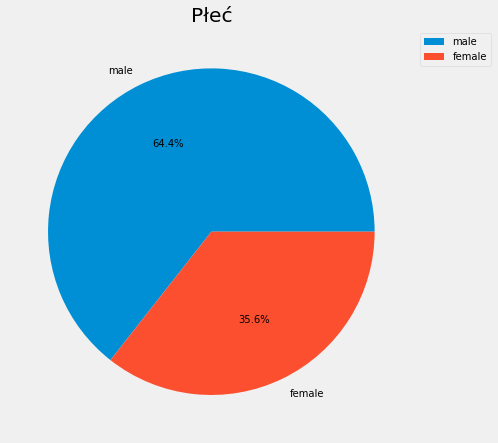

In [153]:
plot_pie_chart(data, feature_value="sex", title="Płeć");

In [154]:
data.groupby(["pclass"], as_index=False).mean()

,pclass,survived,age,sibsp,parch,fare,log_fare
0,1,0.619195,39.159918,0.436533,0.365325,87.508992,4.061210
1,2,0.429603,29.506705,0.393502,0.368231,21.179196,2.828240
2,3,0.255289,24.816367,0.568406,0.400564,13.302889,2.375884


In [155]:
data[["pclass", "survived"]].groupby(["pclass"], as_index=False).mean().sort_values(
    by="survived", ascending=False
)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


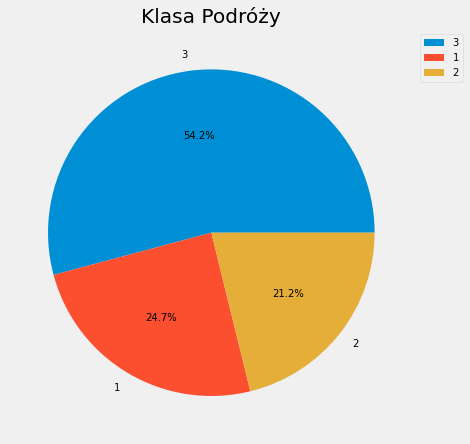

In [156]:
plot_pie_chart(data, feature_value="pclass", title="Klasa Podróży");

In [157]:
data.groupby(["embarked"], as_index=False).mean()

,embarked,pclass,survived,age,sibsp,parch,fare,log_fare
0,C,1.851852,0.555556,32.332154,0.400000,0.370370,62.336267,3.468605
1,Q,2.894309,0.357724,28.630000,0.341463,0.113821,12.409012,2.313702
2,S,2.347921,0.332604,29.245205,0.550328,0.426696,27.418824,2.790191


In [158]:
data[["embarked", "survived"]].groupby(["embarked"], as_index=False).mean().sort_values(
    by="survived", ascending=False
)

,embarked,survived
0,C,0.555556
1,Q,0.357724
2,S,0.332604


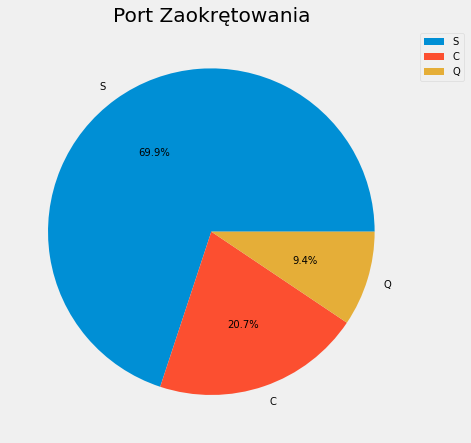

In [159]:
plot_pie_chart(data, feature_value="embarked", title="Port Zaokrętowania");

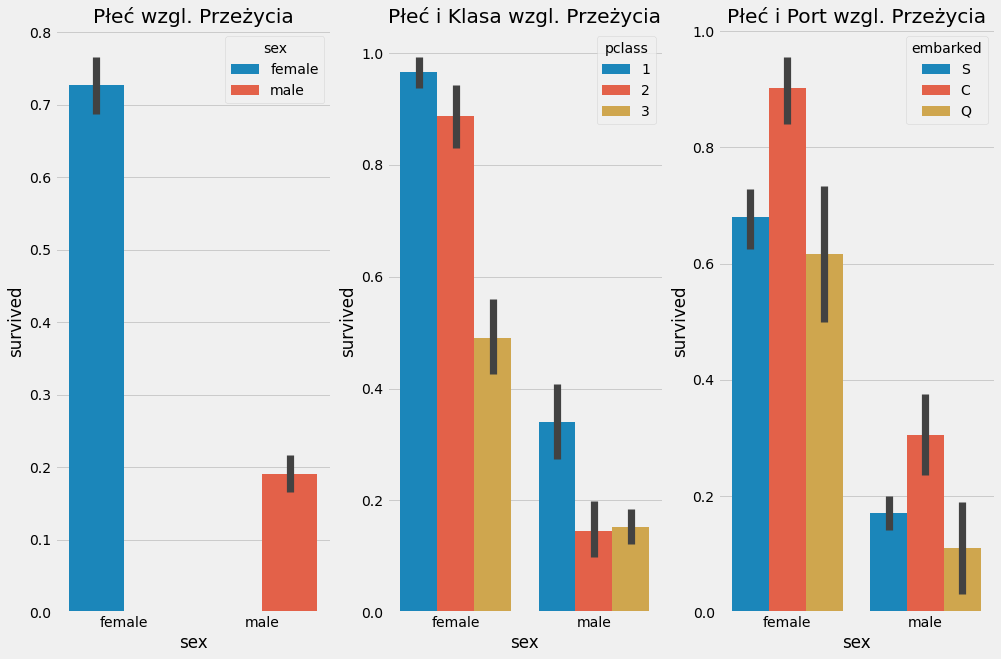

In [148]:
_, qaxis = plt.subplots(1, 3, figsize=(15, 10))

sns.barplot(x="sex", y="survived", hue="sex", data=data, ax=qaxis[0])
qaxis[0].set_title("Płeć wzgl. Przeżycia")

sns.barplot(x="sex", y="survived", hue="pclass", data=data, ax=qaxis[1])
qaxis[1].set_title("Płeć i Klasa wzgl. Przeżycia")

sns.barplot(x="sex", y="survived", hue="embarked", data=data, ax=qaxis[2])
qaxis[2].set_title("Płeć i Port wzgl. Przeżycia");

# 2. Proszę sprawdzić częstości, także procentowe, dla zmiennej survived.

In [18]:
data["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [19]:
data["survived"].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

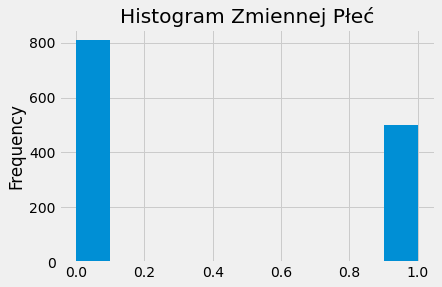

In [144]:
data["survived"].plot.hist(title="Histogram Zmiennej Płeć");

# 3. Proszę sprawdzić liczbę braków danych w poszczególnych kolumnach.

In [73]:
"""Function to calculate missing values by column."""


def missing_values_table(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values_percent = 100 * data_frame.isnull().sum() / len(data_frame)
    missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
    missing_values_table_rename_columns = missing_values_table.rename(
        columns={0: "Missing Values", 1: "Percent of Total Values"}
    )
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = (
        missing_values_table_rename_columns[
            missing_values_table_rename_columns.iloc[:, 1] != 0
        ]
        .sort_values("Percent of Total Values", ascending=False)
        .round(1)
    )
    print(
        "Your selected dataframe has " + str(data_frame.shape[1]) + " columns.\n"
        "There are "
        + str(missing_values_table_rename_columns.shape[0])
        + " columns that have missing values."
    )
    return missing_values_table_rename_columns


In [74]:
missing_values = missing_values_table(data)

Your selected dataframe has 11 columns.
There are 4 columns that have missing values.


In [75]:
missing_values

,Missing Values,Percent of Total Values
cabin,1014,77.5
age,263,20.1
embarked,2,0.2
fare,1,0.1


# 4. Proszę wyświetlić i zinterpretować podstawowe statystyki opisowe (min, max, średnia, mediana, q1, q3) dla wieku i wielkości opłaty za bilet. Dodatkowo proszę narysować histogram dla każdej z tych zmiennych.

In [85]:
data.describe(include="float64")

,age,fare
count,1046.000000,1308.000000
mean,29.881135,33.295479
std,14.413500,51.758668
min,0.166700,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


In [86]:
# @TODO interpretacja

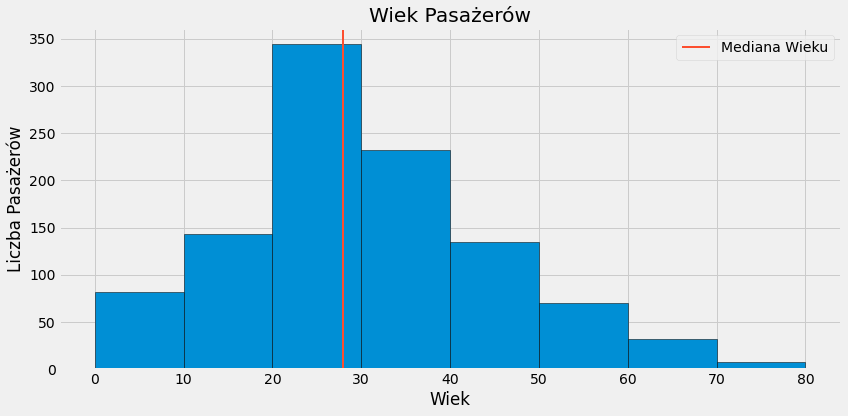

In [129]:
ages = data["age"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.figure(figsize=(12, 6))
plt.hist(ages, bins=bins, edgecolor="black")
median_age = 28
color = "#fc4f30"
plt.axvline(median_age, color=color, label="Mediana Wieku", linewidth=2)
plt.legend()
plt.title("Wiek Pasażerów")
plt.xlabel("Wiek")
plt.ylabel("Liczba Pasażerów")
plt.tight_layout()
plt.show();

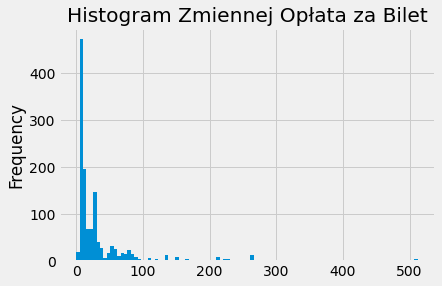

In [140]:
data["fare"].plot.hist(bins=100, title="Histogram Zmiennej Opłata za Bilet");

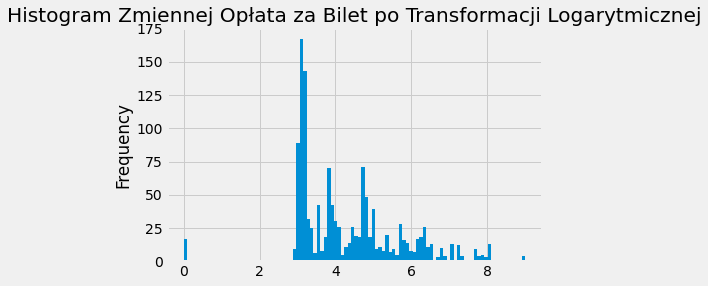

In [143]:
np.log2(data["fare"] + 1).plot.hist(
    bins=100, title="Histogram Zmiennej Opłata za Bilet po Transformacji Logarytmicznej"
);

# 5. Proszę narysować wykres rozrzutu dla opłaty za bilet i wieku oraz policzyć z zinterpretować współczynnik korelacji liniowej między nimi.

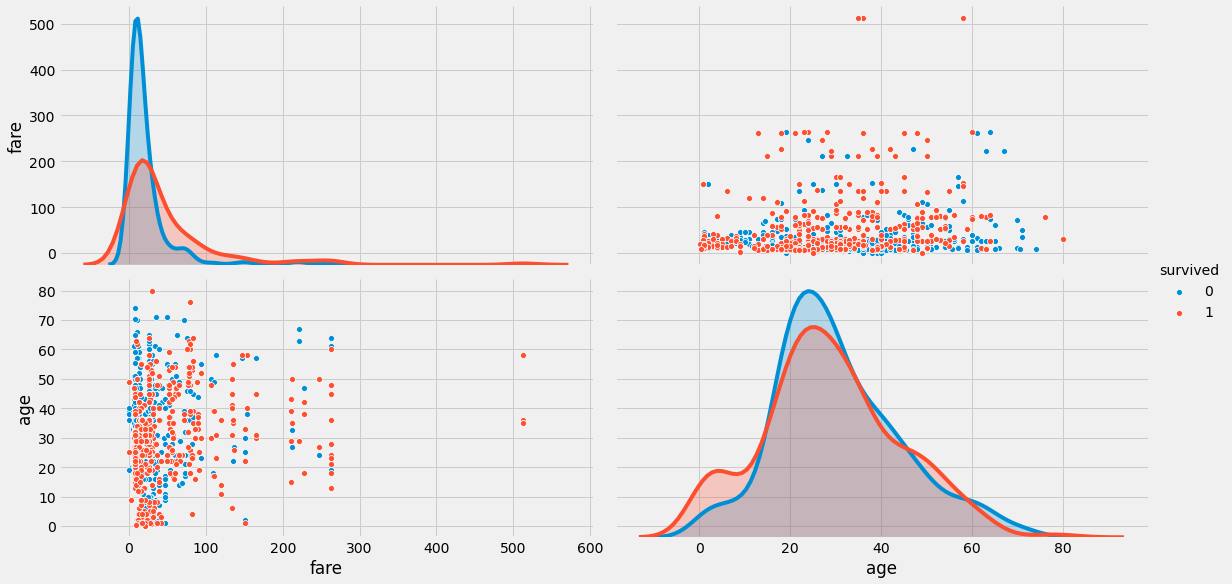

In [176]:
sns.pairplot(
    data, hue="survived", height=4, aspect=2, vars=["fare", "age"], diag_kind="kde"
);

In [178]:
print(
    f"Współczynnik Korelacji Liniowej Między Zmienną Opłata za Bilet, a Zmienną Wiek: {data.fare.corr(data.age):.2f}"
)

Współczynnik Korelacji Liniowej Między Zmienną Opłata za Bilet, a Zmienną Wiek: 0.18


In [149]:
# interpretacja współczynnika

# 6. Proszę podzielić losowo zbiór danych na próbę uczącą i testową wg proporcji 70/30, zachowując możliwość odtworzenia podziału (ziarno losowania)

# 7. Proszę porównać strukturę zmiennej survived w obu zbiorach.

In [1]:
# data peeking!

# 8. Braki danych w kolumnie oznaczającej port zaokrętowania proszę zastąpić wartością "S" w obu zbiorach.

# 9. Braki danych w kolumnie z wiekiem w zbiorze treningowym proszę zastąpić

a) średnią wyliczoną na podstawie całego zbioru

b) medianą wyliczoną osobno w podgrupach wg zmiennej survived

# 10. Wartości średniej/median obliczonych w zadaniu 9 proszę użyć do analogicznego zastąpienia braków danych w próbie testowej

# 11. Na zbiorze uczącym proszę oszacować model regresji logistycznej, wyjaśniający prawdopodobieństwo przeżycia katastrofy Titanica w zależności od innych sensownych zmiennych.

# 12. Proszę ocenić jakość dopasowania modelu regresji logistycznej licząc dla próby uczącej: accuracy, sensitivity, specificity, AUCROC, F1 oraz rysując wykres krzywej ROC. Czy model jest dobrze dopasowany? Prośba o krótki komentarz.

# 13. Na zbiorze uczącym proszę oszacować las losowy (z domyślnymi wartościami hiperparametrów), wyjaśniający prawdopodobieństwo przeżycia katastrofy Titanica w zależności od innych sensownych zmiennych.

# 14. Proszę ocenić jakość dopasowania lasu losowego licząc dla próby uczącej: accuracy, sensitivity, specificity, AUCROC, F1 oraz rysując wykres krzywej ROC. Czy model jest dobrze dopasowany? Prośba o krótki komentarz.

# 15. Oszacowanego modelu regresji logistycznej oraz lasu losowego proszę użyć do wygenerowania prognoz dla próby testowej. Proszę porównać jakość modeli w próbie testowej obliczając accuracy, sensitivity, specificity, AUCROC, F1 oraz rysując wykres krzywych ROC. Który model lepiej sprawdza się w prognozowaniu?